# Single Lightcurve Playground

This notebook tests out different smoothing algorithms to remove variability from lightcurves.

In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *
from scipy.signal import savgol_filter

In [3]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (11.0, 8.0)
plt.rcParams['font.size'] = 16

## Savitzky-Golay

In [4]:
table = import_lightcurve('/storage/astro2/phsqzm/TESS/SPOC_30min/S06/target/0000/0002/7057/7175/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits')

In [5]:
y_smooth = savgol_filter(normalise_lc(table['PDCSAP_FLUX']),99,2)

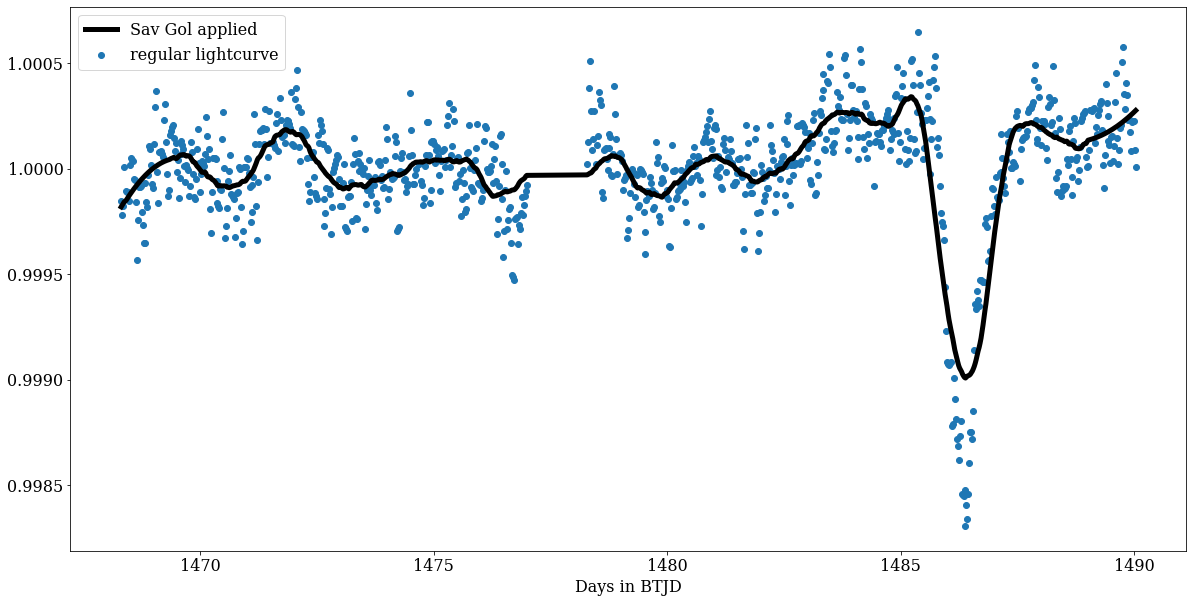

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(table['TIME'],normalise_lc(table['PDCSAP_FLUX']),label='regular lightcurve')
plt.plot(table['TIME'],y_smooth,linewidth=5,label='Sav Gol applied',color='k')
plt.xlabel('Days in BTJD')
plt.legend()
plt.show()

### 2-min SPOC

In [44]:
betapic = import_lightcurve('tess_testlcs/spoc_2min/S6/tess2018349182459-s0006-0000000270577175-0126-s_lc.fits',drop_bad_points=True)

In [47]:
y_smooth2min = savgol_filter(normalise_lc(betapic['PDCSAP_FLUX']),99,2)

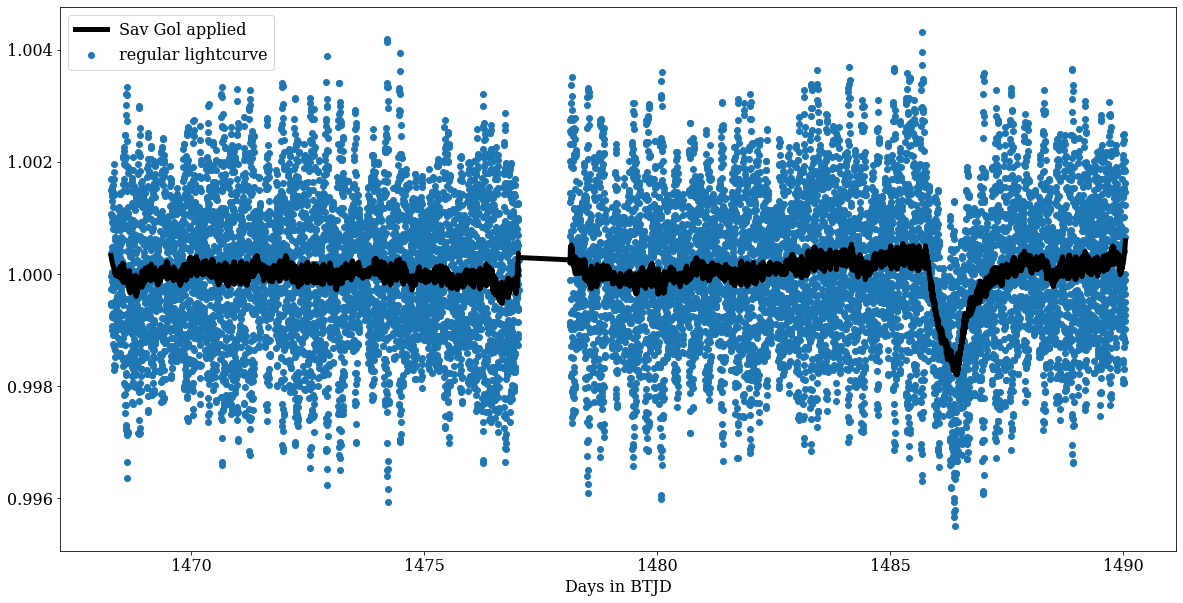

In [50]:
plt.figure(figsize=(20,10))
plt.scatter(betapic['TIME'],normalise_lc(betapic['PDCSAP_FLUX']),label='regular lightcurve')
plt.plot(betapic['TIME'],y_smooth2min,linewidth=5,label='Sav Gol applied',color='k')
plt.xlabel('Days in BTJD')
plt.legend()
plt.show()

### Kepler

In [7]:
data = import_lightcurve('kepler/kplr003542116-2012088054726_llc.fits')

In [8]:
y_smooth_kepler = savgol_filter(normalise_lc(data['PDCSAP_FLUX']),99,2)

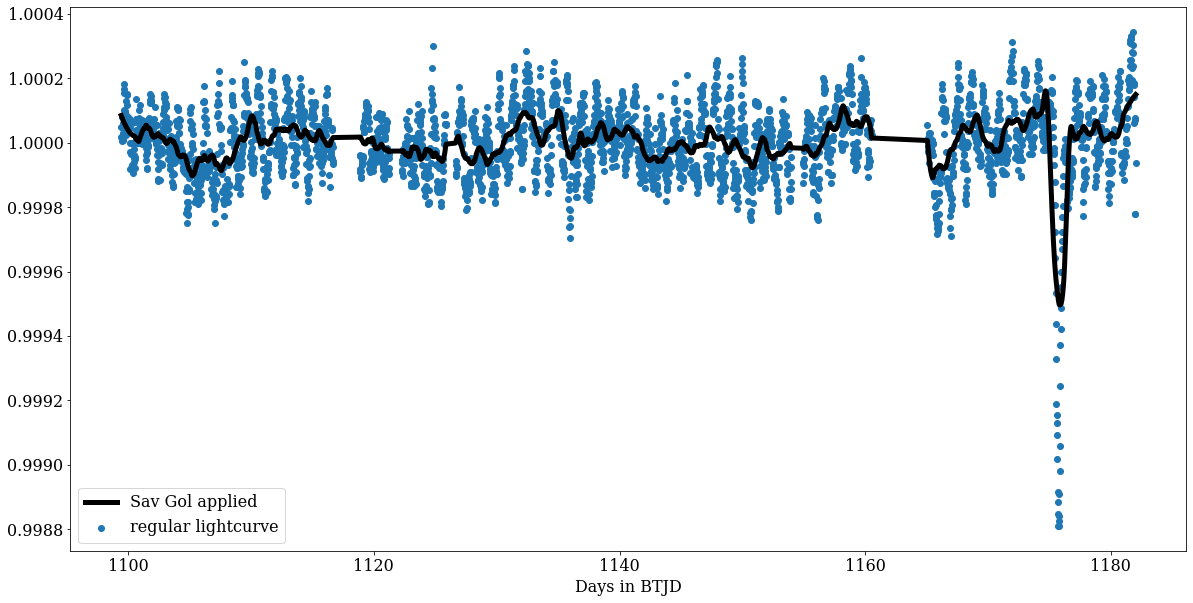

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(data['TIME'],normalise_lc(data['PDCSAP_FLUX']),label='regular lightcurve')
plt.plot(data['TIME'],y_smooth_kepler,linewidth=5,label='Sav Gol applied',color='k')
plt.xlabel('Days in BTJD')
plt.legend()
plt.show()

---

In [10]:
import loaders

In [15]:
lc, _ = import_XRPlightcurve('betapic/tesslcs_sector_6_104_2_min_cadence_targets_tesslc_270577175.pkl',clip=4,sector=6,return_type='pandas')

---

In [24]:
import lightkurve as lk

In [39]:
search = lk.search_lightcurve('Beta Pictoris',mission='TESS')
lc = search[6].download()

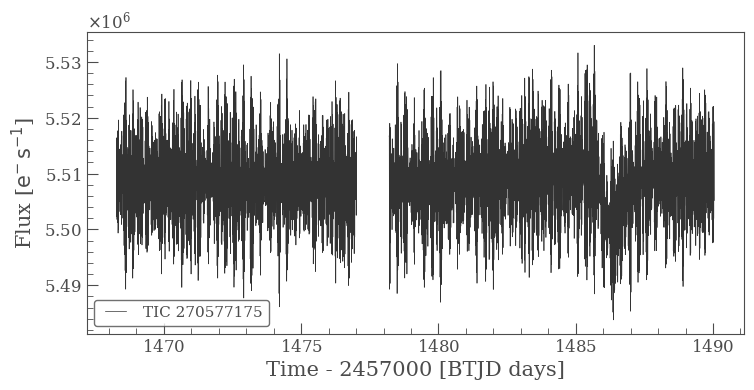

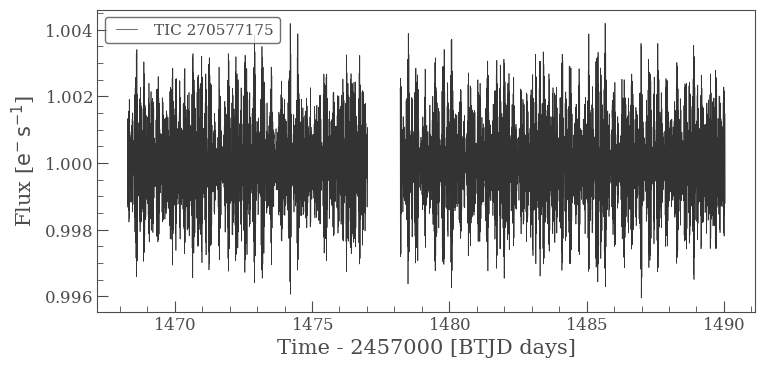

In [40]:
lc.plot()
lc.flatten().plot()

---

### XRP Lightcurve test

In [58]:
lc, _ = import_XRPlightcurve('/storage/astro2/phrdhx/tesslcs/tesslcs_sector_1_104/2_min_cadence_targets/tesslc_159670453.pkl',sector=1,clip=4)
lc_no, _ = import_XRPlightcurve('/storage/astro2/phrdhx/tesslcs/tesslcs_sector_1_104/2_min_cadence_targets/tesslc_159670453.pkl',sector=1,clip=4,drop_bad_points=False)

In [ ]:
q = lc['PCA flux'] == 0

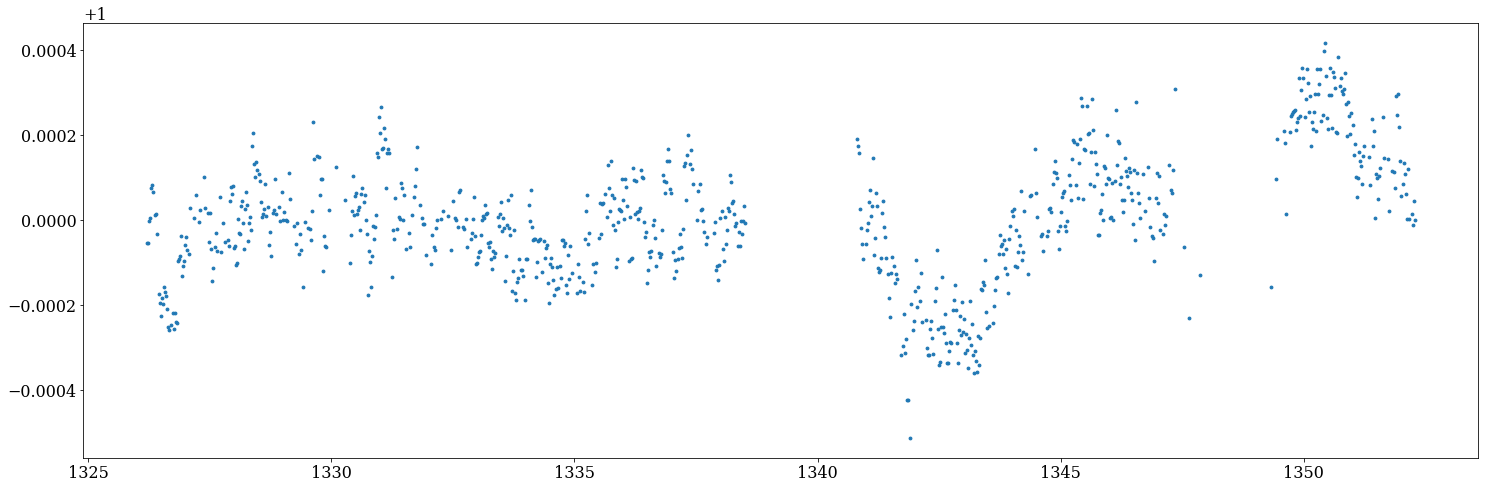

In [70]:
plt.figure(figsize=(25,8))
plt.scatter(lc['time'],normalise_lc(lc['PCA flux']),s=8)
#plt.plot(lc_no['time'],normalise_lc(lc_no['PCA flux']))